In [17]:
import numpy as np
import LatticeDefinitions as ld
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSDump as LD
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [18]:
##File format Tripleline ID, Tripleline Centre, TJ Energy, Radius, TJ Atoms
##GBEnergy, GBAtoms
strDirectory = '/home/paul/csf3_scratch/TripleLines/Axis111/data'
lstAllFilenames = []
strData = ''
for j in range(1,7):
    fin = open(strDirectory + str(j) + '/summary.data' + str(j), 'rt')
    strData +=  fin.read()
df = pd.DataFrame([x.split(',') for x in strData.split('\n')])
df[:16]

,0,1,2,3,4,5,6,7,8
0,1,UTJ0,[118.736 70.7133 42.08883462],-3.2759249358974363,3.0374999999999996,156,-3.297269077376566,6791,241.81519649252454
1,1,UTJ1,[121.614 208.217 42.08883462],-3.3069848611111112,2.025,72,-3.297175903116786,2663,159.2131736842265
2,1,UTJ2,[202.697 70.5002 42.08883462],-3.2866889285714285,2.53125,84,-3.2900914453124996,5126,235.39746402708437
3,1,UTJ3,[201.41 207.104 42.08883462],-3.2903185567010307,3.5437499999999997,194,-3.3102461425251746,5165,153.50978677606992
4,1,UTJ4,[322.757 142.394 42.08883462],-3.2947620000000004,3.5437499999999997,195,-3.30082647863021,7540,226.68111597868338
5,1,UTJ5,[241.568 138.617 42.08883462],-3.288028427672956,3.0374999999999996,159,-3.2974697664543524,6127,221.14124660508668
6,2,UTJ0,[198.72 71.5394 42.08883462],-3.2734931081081085,3.0374999999999996,148,-3.2846493159222434,6748,238.92458652417713
7,2,UTJ1,[122.377 206.359 42.08883462],-3.2465165822784807,2.53125,79,-3.2750098203707236,5241,238.36165779811824
8,2,UTJ2,[ 83.2741 138.622 42.08883462],-3.267629142857143,3.0374999999999996,140,-3.2809928287157506,6533,232.97066521820796
9,2,UTJ3,[203.678 209.309 42.08883462],-3.2637720000000003,1.5187499999999998,35,-3.266022625308135,2436,232.03458484770465


/home/paul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/paul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


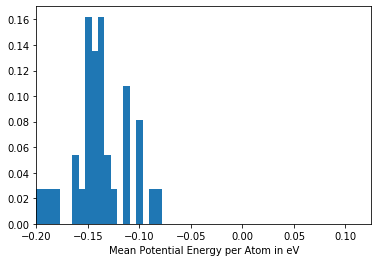

-0.13846050319957148 0.026856727291553206


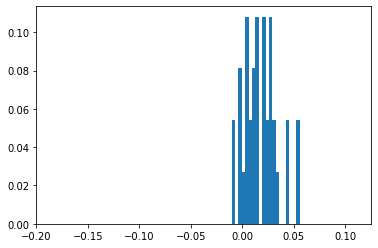

0.017341811325570396 0.016160225265600597


(array([0.21621622, 0.        , 0.24324324, 0.        , 0.10810811,
        0.        , 0.27027027, 0.        , 0.10810811, 0.02702703]),
 array([1.51875 , 1.771875, 2.025   , 2.278125, 2.53125 , 2.784375,
        3.0375  , 3.290625, 3.54375 , 3.796875, 4.05    ]),
 <a list of 10 Patch objects>)

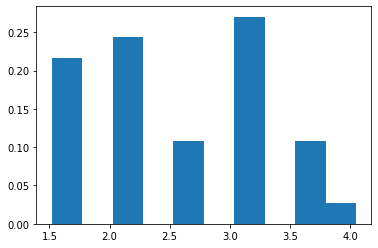

In [19]:
arrPEL = df[3].astype('float')-3*df[6].astype('float')-2*3.3594*np.ones(len(df));
arrPEU = df[3].astype('float')-df[6].astype('float');
plt.xlabel('Mean Potential Energy per Atom in eV')
arrWeights = np.ones(len(arrPEL))/len(arrPEL)
plt.xlim(-0.2,0.125)
plt.hist(arrPEL,bins=20, weights = arrWeights)
plt.show()
print(np.mean(arrPEL), np.std(arrPEL))
plt.hist(arrPEU,bins=20, weights = arrWeights)
plt.xlim(-0.2,0.125)
plt.show()
print(np.mean(arrPEU), np.std(arrPEU))
plt.hist(df[4].astype('float'),weights = arrWeights)


(array([1., 0., 0., 0., 2., 2., 1., 6., 7., 5., 2., 2., 2., 2., 2., 0., 1.,
        0., 0., 1.]),
 array([-0.26575273, -0.25841549, -0.25107825, -0.243741  , -0.23640376,
        -0.22906652, -0.22172928, -0.21439203, -0.20705479, -0.19971755,
        -0.19238031, -0.18504306, -0.17770582, -0.17036858, -0.16303134,
        -0.15569409, -0.14835685, -0.14101961, -0.13368237, -0.12634512,
        -0.11900788]),
 <a list of 20 Patch objects>)

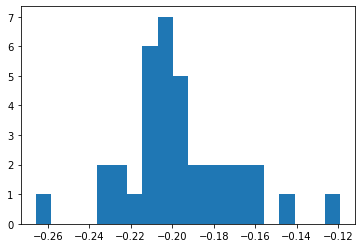

In [20]:
lstPEVol = []
for j in range(len(df)-1):
    arrRow = df.iloc[[j]][[3,4,5]].astype('float').to_numpy()[0]
    lstPEVol.append(arrRow[0]*arrRow[2]/(np.pi*arrRow[1]**2*80.1))
arrRow
plt.hist(lstPEVol, bins =20)

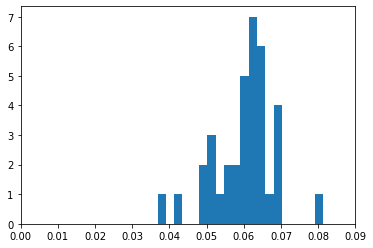

(array([3., 4., 1., 0., 0., 0., 3., 0., 4., 2., 0., 0., 4., 0., 0., 0., 7.,
        4., 3., 1.]),
 array([0.0431495 , 0.04400881, 0.04486812, 0.04572742, 0.04658673,
        0.04744604, 0.04830535, 0.04916466, 0.05002396, 0.05088327,
        0.05174258, 0.05260189, 0.0534612 , 0.0543205 , 0.05517981,
        0.05603912, 0.05689843, 0.05775774, 0.05861704, 0.05947635,
        0.06033566]),
 <a list of 20 Patch objects>)

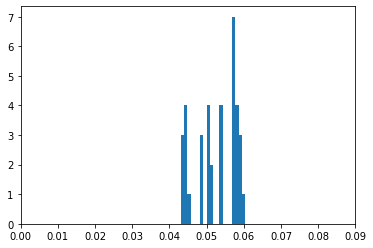

In [30]:
lstDensity = []
for j in range(len(df)-1):
    arrRow = df.iloc[[j]][[4,5]].astype('float').to_numpy()[0]
    lstDensity.append(arrRow[1]/(np.pi*arrRow[0]**2*80.1))
plt.hist(lstDensity, bins =20)
plt.xlim(0,0.09)
plt.show()
lstDensity = []
for j in range(len(df)-1):
    arrRow = df.iloc[[j]][[4,7,8]].astype('float').to_numpy()[0]
    lstDensity.append(arrRow[1]/(2*arrRow[0]*arrRow[2]*80.1))
plt.xlim(0,0.09)
plt.hist(lstDensity, bins =20)

